In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
import FinanceDataReader as fdr

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [63]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [28]:
df_krx.shape

(7307, 10)

# 영업이익 적자 기업 크롤링

In [64]:
df_k = df_krx[(df_krx['Market']=='KOSDAQ')]
df_k

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
54,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7579,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
7580,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
7581,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7586,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [66]:
df_k1 = df_k[~df_k['Sector'].isnull()]
df_k1

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
54,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7579,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
7580,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
7581,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7586,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [67]:
earning19 = []
earning20 = []
earning21 = []
code_list = []
name_list = []
listing_date = []

count = -1
for code in df_k1['Symbol']:
    count += 1
    print(count)
    # iframe url
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(0.3)
    try:
        html = driver.page_source
        df = pd.read_html(html)[12]
        earning19.append(df.iloc[1,1])
        earning20.append(df.iloc[1,2])
        earning21.append(df.iloc[1,3])
        code_list.append(code)
    
        name = df_k[df_k['Symbol']== str(code)]['Name'].iloc[0]
        name_list.append(name)
    
        date = df_k[df_k['Symbol']== str(code)]['ListingDate'].iloc[0]
        listing_date.append(date)
        
    except:
        print(code)
        print('스킵')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [69]:
df_earning = pd.DataFrame({'회사코드': code_list,'회사이름':name_list,'상장일':listing_date,'2019년영업이익':earning19, '2020년영업이익':earning20, '2021년영업이익':earning21 })
df_earning.to_csv('./data/코스닥영업이익.csv')
df_earning


,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
0,060310,3S,2002-04-23,17.0,5.0,-14.0
1,054620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
2,265520,AP시스템,2017-04-07,284.0,463.0,643.0
3,211270,AP위성,2016-03-04,71.0,44.0,8.0
4,032790,BNGT,1997-06-26,-34.0,-3.0,1.0
...,...,...,...,...,...,...
1549,024060,흥구석유,1994-12-07,5.0,-5.0,0.0
1550,010240,흥국,2009-05-12,89.0,156.0,138.0
1551,189980,흥국에프엔비,2015-08-07,58.0,25.0,67.0
1552,037440,희림,2000-02-03,72.0,91.0,83.0


## 저장파일 사용(df_earning,df_minus)

In [149]:
df_earning = pd.read_csv('./data/코스닥영업이익.csv',index_col=0)
df_earning.head()

,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
0,60310,3S,2002-04-23,17.0,5.0,-14.0
1,54620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
2,265520,AP시스템,2017-04-07,284.0,463.0,643.0
3,211270,AP위성,2016-03-04,71.0,44.0,8.0
4,32790,BNGT,1997-06-26,-34.0,-3.0,1.0


In [150]:
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus

,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
1,54620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
7,311690,CJ 바이오사이언스,2019-12-26,-45.0,-85.0,-101.0
11,56730,CNT85,2002-01-04,-35.0,-48.0,-2.0
19,245620,EDGC,2018-06-26,-86.0,-51.0,-156.0
22,84180,EV수성,2005-12-16,-11.0,-7.0,-5.0
...,...,...,...,...,...,...
1510,2680,한탑,1995-07-07,-78.0,-103.0,-46.0
1514,59270,해성티피씨,2021-04-21,-13.0,-3.0,-11.0
1517,84990,헬릭스미스,2005-12-29,-417.0,-551.0,-485.0
1530,64240,홈캐스트,2003-06-11,-89.0,-20.0,-46.0


In [151]:
df_minus1 = df_minus[df_minus['상장일']<= '2014-01-01']
df_minus1

,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
1,54620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
11,56730,CNT85,2002-01-04,-35.0,-48.0,-2.0
22,84180,EV수성,2005-12-16,-11.0,-7.0,-5.0
30,28300,HLB,1996-07-27,-487.0,-613.0,-1010.0
31,67630,HLB생명과학,2008-11-25,-45.0,-81.0,-185.0
...,...,...,...,...,...,...
1504,123840,한일진공,2010-10-05,-84.0,-87.0,-74.0
1510,2680,한탑,1995-07-07,-78.0,-103.0,-46.0
1517,84990,헬릭스미스,2005-12-29,-417.0,-551.0,-485.0
1530,64240,홈캐스트,2003-06-11,-89.0,-20.0,-46.0


In [ ]:
df_earning = pd.read_csv('./data/코스닥영업이익.csv',index_col=0)
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus1 = df_minus[df_minus['상장일']<= '2014-01-01']

# 적자기업 주가

In [85]:
import FinanceDataReader as fdr

In [89]:
df_p = fdr.DataReader('084180','2015','2022')
df_p

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177
2015-01-05,1119,1152,1109,1131,5018,-0.019081
2015-01-06,1139,1139,1100,1136,5152,0.004421
2015-01-07,1142,1175,1116,1174,2464,0.033451
2015-01-08,1173,1180,1142,1146,812,-0.023850
...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227
2021-12-27,2010,2040,1845,1865,1907977,-0.088020
2021-12-28,1870,1925,1810,1870,688542,0.002681


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   1.,   1.,   2.,   0.,   0.,   2.,   3.,   1.,   0.,
          6.,   3.,   9.,   2.,   9.,  13.,  11.,  12.,  25.,  30.,  38.,
         44.,  52.,  74.,  77., 126., 550., 126., 100.,  79.,  67.,  45.,
         38.,  29.,  32.,  18.,  17.,   9.,   6.,   7.,   5.,   4.,   9.,
          3.,   2.,   5.,   1.,   5.,   3.,   0.,   2.,   1.,   1.,   0.,
          0.,   1.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          5.]),
 array([-0.29899085, -0.29300094, -0.28701103, -0.28102112, -0.27503121,
        -0.2690413 , -0.2630514 , -0.25706149, -0.25107158, -0.24508167,
        -0.23909176, -0.23310185, -0.22711195, -0.22112204, -0.21513213,
        -0.20914222, -0.20315231, -0.1971624 , -0.19117249, -0.18518259,
        -0.17919268, -0.17

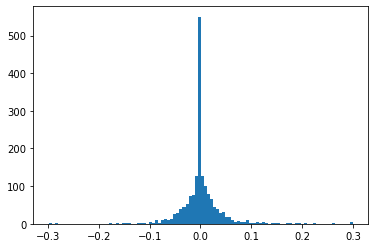

In [92]:
plt.hist(df_p['Change'], bins=100)

In [94]:
df_p[(df_p['Change']==0) & (df_p['Volume']==0)]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-09,0,0,0,1636,0,0.0
2018-03-19,0,0,0,1900,0,0.0
2018-03-20,0,0,0,1900,0,0.0
2018-03-21,0,0,0,1900,0,0.0
2018-03-22,0,0,0,1900,0,0.0
...,...,...,...,...,...,...
2019-08-21,0,0,0,1900,0,0.0
2019-08-22,0,0,0,1900,0,0.0
2019-08-23,0,0,0,1900,0,0.0


In [127]:
df_p1 = df_p[df_p['Volume']!=0]
df_p1

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator,20ma,20std,upper_b,lower_b,OBV,OBV_EMA
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000,NaN,NaN,NaN,NaN,0,0.000000e+00
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167,NaN,NaN,NaN,NaN,-5018,-2.634450e+03
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918,NaN,NaN,NaN,NaN,134,-1.617892e+03
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600,NaN,NaN,NaN,NaN,2598,-4.008290e+02
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666,NaN,NaN,NaN,NaN,1786,1.281463e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326,1912.75,147.786074,2208.322148,1617.177852,136212926,1.300017e+08
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960,1917.75,144.171636,2206.093271,1629.406729,134304949,1.304115e+08
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440,1925.50,136.669983,2198.839966,1652.160034,134993491,1.308479e+08


# 기술적 지표

## 추세지표: MACD, MACD Oscilator

* MACD: 12일 지수이동평균선(12일EMA) - 26일 지수이동평균선(26일EMA)
* MACD Signal = MACD의 9일 단순이동평균선
* MACD Oscilator = MACD Signal 값을 막대로 표현한 보조지표

In [104]:
df_p['MACD'] = df_p['Close'].ewm(span= 12).mean()
df_p['MACD_Signal'] = df_p['MACD'].ewm(span= 26).mean()
df_p['MACD_Oscilator'] = df_p['MACD'] - df_p['MACD_Signal']
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator
Date,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440


## 모멘텀지표: 스토케스틱

* 스토케스틱<br>
C=최근종가, L5= 과거5일 동안의 최저점, H5= 과거5일 동안의 최고점<br>

%k = (C-L5)/(H5-L5)*100% <br> 
%D = (%k(t-2) + %K(t-1) + %K(t)) /3 <br>

%K 
1. %D선을 통과하는가
2. %K의 수준
85이상: 과매수 구간 매도사인<br>
70이상: 일반적 상승추세<br>
30이하: 일반적 하락추세<br>
15이하: 과매도 구간 매수사인

In [97]:
# L5
df_p['L5'] = df_p['Close'].rolling(5).min()
df_p

,Open,High,Low,Close,Volume,Change,L5
Date,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0
...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0


In [98]:
# H5
df_p['H5'] = df_p['Close'].rolling(5).max()
df_p

,Open,High,Low,Close,Volume,Change,L5,H5
Date,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0
...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0


In [99]:
# %K 만들기: (C-L5)/(H5-L5)*100%
df_p['%K'] = (df_p['Close']-df_p['L5'])*100/(df_p['H5']-df_p['L5'])
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K
Date,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721
...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701


In [102]:
# %D 만들기: %D = (%k(t-2) + %K(t-1) + %K(t)) /3
df_p['%D'] = df_p['%K'].rolling(3).sum()/3
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D
Date,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070


## 변동성지표:  볼린져밴드

In [106]:
df_p['20ma'] = df_p['Close'].rolling(20).mean()
df_p['20std'] = df_p['Close'].rolling(20).std()
df_p['upper_b'] = df_p['20ma'] + (df_p['20std']*2)
df_p['lower_b'] = df_p['20ma'] - (df_p['20std']*2)
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator,20ma,20std,upper_b,lower_b
Date,,,,,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167,NaN,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918,NaN,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600,NaN,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326,1912.75,147.786074,2208.322148,1617.177852
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960,1917.75,144.171636,2206.093271,1629.406729
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440,1925.50,136.669983,2198.839966,1652.160034


## 시장강도(거래량) 지표: OBV, AD

* OBV : 전일 종가보다 금일 종가가 상승하면 오늘 거래량을 더하고 반대로 하락하면 오늘 거래량을 빼주어 누적계산

* AD: 당일 주가 변동폭의 중간 값에 대한 종가의 비율을 당일 거래량에 곱한 수치를 누적계산<br>
A/D(t) = [((C-L) - (H-C)) / (H-L)] x Vol + A/D(t-1)

In [110]:
# OBV
OBV = []
OBV.append(0)

for i in range(1,len(df_p)):
    if df_p['Close'].iloc[i] > df_p['Close'].iloc[i-1]:
        OBV.append(OBV[-1] + df_p['Volume'].iloc[i])
    elif df_p['Close'].iloc[i] < df_p['Close'].iloc[i-1]:
        OBV.append(OBV[-1] - df_p['Volume'].iloc[i])
    else:
        OBV.append(OBV[-1])
        
df_p['OBV'] = OBV
df_p['OBV_EMA'] = df_p['OBV'].ewm(span=20).mean()

In [111]:
 df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator,20ma,20std,upper_b,lower_b,OBV,OBV_EMA
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000,NaN,NaN,NaN,NaN,0,0.000000e+00
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167,NaN,NaN,NaN,NaN,-5018,-2.634450e+03
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918,NaN,NaN,NaN,NaN,134,-1.617892e+03
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600,NaN,NaN,NaN,NaN,2598,-4.008290e+02
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666,NaN,NaN,NaN,NaN,1786,1.281463e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326,1912.75,147.786074,2208.322148,1617.177852,136212926,1.300017e+08
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960,1917.75,144.171636,2206.093271,1629.406729,134304949,1.304115e+08
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440,1925.50,136.669983,2198.839966,1652.160034,134993491,1.308479e+08


In [112]:
# AD
# A/D(t) = [((C-L) - (H-C)) / (H-L)] x Vol + A/D(t-1)

In [151]:
AD = []
value = 0
for row in df_p.itertuples():
    if (row.High- row.Low) !=0:
        value += ((row.Close-row.Low)/ (row.High- row.Low)) * row.Volume
        AD.append (value)
    else:
        AD.append(np.NaN)

df_p['AD'] = AD

In [ ]:
df_p1

In [121]:
for row in df_p.itertuples():
    print(row.Close)

1153
1131
1136
1174
1146
1148
1172
1202
1143
1136
1141
1136
1141
1133
1120
1140
1125
1109
1107
1105
1102
1086
1100
1097
1097
1117
1140
1128
1143
1149
1146
1154
1148
1148
1166
1179
1205
1238
1311
1249
1264
1252
1224
1233
1234
1239
1241
1223
1208
1205
1205
1189
1180
1208
1180
1151
1154
1110
1113
1133
1136
1136
1143
1162
1176
1174
1176
1172
1182
1179
1169
1166
1177
1172
1187
1205
1197
1174
1190
1185
1210
1192
1203
1202
1211
1252
1252
1275
1285
1275
1264
1236
1220
1176
1189
1195
1195
1185
1200
1184
1143
1158
1154
1185
1202
1174
1156
1207
1228
1242
1241
1244
1365
1345
1347
1412
1419
1464
1427
1427
1340
1371
1384
1388
1373
1352
1366
1417
1404
1407
1438
1429
1425
1430
1412
1429
1464
1430
1417
1381
1368
1362
1329
1329
1332
1371
1368
1363
1339
1332
1335
1352
1352
1339
1298
1239
1239
1231
1195
1192
1226
1223
1224
1252
1244
1244
1233
1303
1293
1273
1260
1260
1273
1329
1242
1238
1254
1241
1251
1247
1244
1241
1265
1270
1270
1273
1287
1300
1300
1334
1329
1339
1306
1316
1659
1383
1368
1371
1370
1375


# 시장추세

## KOSDAQ: df_KQ

In [110]:
df_kQ = fdr.DataReader('KQ11', '2014-01-01')
df_kQ

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,496.28,502.41,502.87,496.06,2.642700e+05,-0.0074
2014-01-03,499.33,496.67,499.33,493.79,2.951000e+05,0.0061
2014-01-06,500.62,500.86,501.29,498.73,2.887100e+05,0.0026
2014-01-07,504.86,500.42,505.02,500.42,3.324500e+05,0.0085
2014-01-08,509.78,507.55,510.60,506.41,3.687500e+05,0.0097
...,...,...,...,...,...,...
2022-05-16,856.25,862.24,866.47,855.45,1.010000e+09,0.0037
2022-05-17,865.98,857.28,866.21,856.30,9.138100e+08,0.0114
2022-05-18,871.57,872.19,876.82,868.28,1.060000e+09,0.0065


In [117]:
df_kQ[:20]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,496.28,502.41,502.87,496.06,264270.0,-0.0074
2014-01-03,499.33,496.67,499.33,493.79,295100.0,0.0061
2014-01-06,500.62,500.86,501.29,498.73,288710.0,0.0026
2014-01-07,504.86,500.42,505.02,500.42,332450.0,0.0085
2014-01-08,509.78,507.55,510.60,506.41,368750.0,0.0097
2014-01-09,511.60,511.00,512.30,510.54,363960.0,0.0036
2014-01-10,510.19,513.68,513.89,507.11,399610.0,-0.0028
2014-01-13,512.92,511.59,513.76,511.59,375910.0,0.0054
2014-01-14,512.27,511.48,514.75,511.41,410680.0,-0.0013


In [116]:
df_kQ.reset_index()[['Date','Change']]

,Date,Change
0,2014-01-02,-0.0074
1,2014-01-03,0.0061
2,2014-01-06,0.0026
3,2014-01-07,0.0085
4,2014-01-08,0.0097
...,...,...
2058,2022-05-16,0.0037
2059,2022-05-17,0.0114
2060,2022-05-18,0.0065
2061,2022-05-19,-0.0089


## 미국지수: NASDAQ(df_ND), S&P(df_SP)

In [57]:
df_ND = fdr.DataReader('IXIC', '2014-01-01')
df_ND

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,4143.07,4160.03,4160.96,4131.79,4.282300e+08,-0.0080
2014-01-03,4131.91,4148.56,4152.96,4124.96,3.819100e+08,-0.0027
2014-01-06,4113.68,4137.03,4139.78,4103.75,5.262500e+08,-0.0044
2014-01-07,4153.18,4128.57,4158.18,4126.48,5.135300e+08,0.0096
2014-01-08,4165.61,4154.28,4171.75,4145.00,5.453400e+08,0.0030
...,...,...,...,...,...,...
2022-05-13,11805.00,11555.97,11856.71,11510.25,1.230000e+09,0.0382
2022-05-16,11662.79,11727.14,11804.59,11627.53,9.780600e+08,-0.0120
2022-05-17,11984.52,11905.57,11988.43,11754.28,1.020000e+09,0.0276


In [118]:
df_ND[:20]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,4143.07,4160.03,4160.96,4131.79,428230000.0,-0.0080
2014-01-03,4131.91,4148.56,4152.96,4124.96,381910000.0,-0.0027
2014-01-06,4113.68,4137.03,4139.78,4103.75,526250000.0,-0.0044
2014-01-07,4153.18,4128.57,4158.18,4126.48,513530000.0,0.0096
2014-01-08,4165.61,4154.28,4171.75,4145.00,545340000.0,0.0030
2014-01-09,4156.19,4179.04,4182.74,4142.70,520400000.0,-0.0023
2014-01-10,4174.66,4168.94,4174.68,4142.21,483380000.0,0.0044
2014-01-13,4113.30,4167.41,4179.47,4097.99,549440000.0,-0.0147
2014-01-14,4183.02,4129.60,4183.84,4125.81,470400000.0,0.0169


In [7]:
df_SP = fdr.DataReader('US500', '2014-01-01')
df_SP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,1831.98,1845.86,1845.86,1827.74,0.0,-0.0089
2014-01-03,1831.37,1833.21,1838.24,1829.13,0.0,-0.0003
2014-01-06,1826.77,1832.31,1837.16,1823.73,0.0,-0.0025
2014-01-07,1837.88,1828.71,1840.10,1828.71,0.0,0.0061
2014-01-08,1837.49,1837.90,1840.02,1831.40,0.0,-0.0002
...,...,...,...,...,...,...
2022-05-12,3930.08,3903.95,3964.80,3858.87,0.0,-0.0013
2022-05-13,4023.89,3963.90,4038.88,3963.90,0.0,0.0239
2022-05-16,4008.01,4013.02,4046.46,3983.99,0.0,-0.0039


# 함수화

* chart_indicator
* chart_length1
* chart_length2
* chart_zero_nan

## chart_indicator

In [99]:
def chart_indicator(df):
    # 추세지표
    df['MACD'] = df['Close'].ewm(span= 12).mean()
    df['MACD_Signal'] = df['MACD'].ewm(span= 26).mean()
    df['MACD_Oscilator'] = df['MACD'] - df['MACD_Signal']

    # 모멘텀지표

    df['L5'] = df['Close'].rolling(5).min()
    df['H5'] = df['Close'].rolling(5).max()
    df['%K'] = (df['Close']-df['L5'])*100/(df['H5']-df['L5'])
    df['%D'] = df['%K'].rolling(3).sum()/3


    # 변동성지표(볼린져밴드)
    df['20ma'] = df['Close'].rolling(20).mean()
    df['20std'] = df['Close'].rolling(20).std()
    df['upper_b'] = df['20ma'] + (df['20std']*2)
    df['lower_b'] = df['20ma'] - (df['20std']*2)


    # 거래량지표

    OBV = []
    value_obv = 0
    
    for i in range(len(df)):

        if df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            value_obv = value_obv + df['Volume'].iloc[i]
            OBV.append(value_obv)
        elif df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            value_obv = value_obv - df['Volume'].iloc[i]
            OBV.append(value_obv)
        else:
            OBV.append(value_obv)

    df['OBV'] = OBV
    df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()

    AD = []
    value = 0
    for row in df.itertuples():
        if (row.High- row.Low) !=0:
            value += ((row.Close-row.Low)/ (row.High- row.Low)) * row.Volume
            AD.append (value)
        else:
            AD.append(np.NaN)

    df['AD'] = AD
    
    return df
    

## chart_length

In [100]:
# 차트데이터 윗꼬리 아랫꼬리 봉의 절대적 길이

def chart_length1(df):
    
    up_tail = []
    down_tail = []
    bar_length = []
    
    for row in df.itertuples():
    
        # 종가 > 시가
        if row.Close> row.Open:
            
            up= row.High - row.Close
            up_tail.append(up)
            down = row.Open - row.Low
            down_tail.append(down)
            bar = row.Close - row.Open
            bar_length.append(bar)
            
        elif row.Close< row.Open:
            # 윗꼬리
            up = row.High - row.Open
            up_tail.append(up)
            # 아랫꼬리
            down = row.Close - row.Low
            down_tail.append(down)
             # 봉길이
            bar = row.Open - row.Close
            bar_length.append(bar)

        else:
            up = row.High - row.Open
            up_tail.append(up)
            down = row.Close - row.Low
            down_tail.append(down)
            bar = row.Close - row.Open  # 0값
            bar_length.append(bar)
    
    df['up_tail'] = up_tail
    df['down_tail'] = down_tail
    df['bar_length'] = bar_length
    
    return df


## chart_length2

In [101]:
def chart_length2(df):
    
    df['High-Close'] = df['High'] - df['Close']
    df['High-Open'] = df['High'] - df['Open']
    df['High-Low'] = df['High'] - df['Low']
    
    df['Close-Open'] = df['Close']- df['Open']
    df['Close-Low'] = df['Close'] - df['Low']
    
    df['Open-Low'] = df['Open'] - df['Low']
    
    return df

## change_zero_nan

In [108]:
# 차트데이터 0값 처리 -> 최솟값보다 작은값으로 바꿔주기
def change_zero_nan(df):
    
    df1 = df[df['Volume']!=0]
    
    for col in df1.columns:
        
        # (volume 0값 제외 가정시) 최솟값/2 를 0 대신 넣어줌
        min2 = df1[col].sort_values(ascending=True).drop_duplicates()[1]/2
        df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)    
        df1.dropna(inplace=True)
        
    return df1

## add_mkindex

In [145]:
# 시장지수 붙이기 df_KQ,df_ND,df_SP 선언가정
def add_mkindex(df):
    df = df.reset_index()
    
    df_KQ1 = df_kQ.reset_index()[['Date','Change']]
    df_KQ1.columns = ['Date', 'KQ_Change']
    
    # 미국시장 하루 차이
    df_ND1 = df_ND.reset_index()[['Date','Change']]
    df_ND1.columns = ['Date', 'ND_Change']
    
    df_SP1 = df_SP.reset_index()[['Date','Change']]
    df_SP1['Change'] = df_SP1['Change'].shift(1)
    df_SP1.columns = ['Date', 'SP_Change']
    
    
    df1 = pd.merge(df_KQ1, df_ND1, on='Date', how='left')
    df2 = pd.merge(df1, df_SP1, on= 'Date', how='left')
    df3 = pd.merge(df,df2, on='Date',how ='left' )
    
    
    df3['ND_Change'] = df3['ND_Change'].shift(1)
    # shift로 인한 월요일 공백
    df3['ND_Change'] = df3['ND_Change'].fillna(method = 'ffill')
    # 첫행 채우기
    df3['ND_Change'] = df3['ND_Change'].fillna(method = 'bfill')
    
    df3['SP_Change'] = df3['SP_Change'].shift(1)
    df3['SP_Change'] = df3['SP_Change'].fillna(method = 'ffill')
    df3['SP_Change'] = df3['SP_Change'].fillna(method = 'bfill')
    
    return df3

## use_col

In [130]:
# 사용할 컬럼만 남기기
def use_col(df):
    
    df= df[['Date','Close', 'Volume', 'Change', 'MACD','MACD_Signal', 'MACD_Oscilator', '%K', '%D',\
       'upper_b', 'lower_b', 'OBV', 'OBV_EMA', 'AD', 'up_tail',\
       'down_tail', 'bar_length', 'High-Close', 'High-Open', 'High-Low',\
       'Close-Open', 'Close-Low', 'Open-Low','KQ_Change','ND_Change','SP_Change']]
    
    return df

## mscaler

In [203]:
from sklearn.preprocessing import MinMaxScaler
def mscaler(df):
    scaler = MinMaxScaler()
    df.iloc[:,4:] = scaler.fit_transform(df.iloc[:,4:])
    return df

## change_zero

In [229]:
def change_zero(df):
    
    for col in df.columns[4:]:
        
        # (volume 0값 제외 가정시) 최솟값/2 를 0 대신 넣어줌
        min2 = df[col].sort_values(ascending=True).drop_duplicates().iloc[1]/2
        df[col] = df[col].apply(lambda x : min2 if x==0 else x)    
        
    return df

# 함수화 사용해보기

In [232]:
df = fdr.DataReader('203400','2015','2022')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,7700,7700,7700,7700,0,0.000000
2015-01-05,7700,7700,7700,7700,0,0.000000
2015-01-06,7700,7700,7700,7700,0,0.000000
2015-01-07,7700,7700,7700,7700,0,0.000000
2015-01-08,7700,7700,7700,7700,0,0.000000
...,...,...,...,...,...,...
2021-12-24,14150,14950,13500,14750,100538,0.035088
2021-12-27,14650,15550,14150,14750,101839,0.000000
2021-12-28,14900,14900,13800,13800,123066,-0.064407


In [233]:
df = chart_indicator(df)
df = chart_length1(df)
df = chart_length2(df)
df = change_zero_nan(df)
df = add_mkindex(df)
df = use_col(df)
df = mscaler(df)
df = change_zero(df)
df

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2015-03-04,13500,4500,-0.068966,0.551720,0.423394,0.989101,0.173668,0.623932,0.604219,...,0.410555,0.344451,0.000245,0.255774,0.213740,0.000284,0.389214,0.595887,0.556530,0.539794
1,2015-03-23,9600,300,-0.074910,0.376485,0.458328,0.300200,1.000000,0.897436,0.563218,...,0.002056,0.001725,0.000245,0.000855,0.441221,0.000284,0.001949,0.561454,0.556530,0.539794
2,2015-04-16,10800,609,0.004651,0.398504,0.425053,0.472404,1.000000,1.000000,0.340918,...,0.218643,0.206440,0.019127,0.153122,0.320611,0.000284,0.207277,0.586801,0.554222,0.602996
3,2015-04-22,11500,910,0.055046,0.412802,0.429630,0.506592,1.000000,1.000000,0.353647,...,0.136395,0.114434,0.000245,0.084688,0.366412,0.000284,0.129305,0.485414,0.565759,0.584738
4,2015-04-23,12650,110,0.100000,0.429580,0.432558,0.553954,1.000000,1.000000,0.376659,...,0.588759,0.000288,0.421285,0.366980,0.770992,0.488346,0.000325,0.486370,0.587910,0.553839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,2021-12-24,14750,100538,0.035088,0.622508,0.637431,0.590963,0.412530,0.138889,0.622820,...,0.163811,0.045428,0.156449,0.247220,0.534351,0.283684,0.168291,0.579627,0.607753,0.608614
1505,2021-12-27,14750,101839,-0.074910,0.626116,0.641360,0.591365,1.000000,0.472222,0.628680,...,0.026731,0.183439,0.176067,0.238666,0.458015,0.135873,0.129305,0.578670,0.607753,0.608614
1506,2021-12-28,13800,123066,-0.064407,0.620532,0.644532,0.563308,0.003546,0.472222,0.625675,...,0.300891,0.252444,0.000245,0.187340,0.274809,0.000284,0.285250,0.636059,0.632672,0.589888
1507,2021-12-29,14300,82137,0.036232,0.620353,0.647455,0.554046,0.522956,0.508772,0.623000,...,0.095271,0.079931,0.136832,0.118905,0.496183,0.079022,0.000325,0.562889,0.542686,0.625468


In [198]:
df.isnull().sum()

Date              0
Close             0
Volume            0
Change            0
MACD              0
MACD_Signal       0
MACD_Oscilator    0
%K                0
%D                0
upper_b           0
lower_b           0
OBV               0
OBV_EMA           0
AD                0
up_tail           0
down_tail         0
bar_length        0
High-Close        0
High-Open         0
High-Low          0
Close-Open        0
Close-Low         0
Open-Low          0
KQ_Change         0
ND_Change         0
SP_Change         0
dtype: int64

In [219]:
df[df['Close-Low']==0]

,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2015-03-04,13500,4500,-0.068966,0.551720,0.423394,0.989101,0.173668,6.239316e-01,0.604219,...,0.410555,0.344451,0.000000,0.255774,0.213740,0.0,0.389214,0.595887,0.556530,0.539794
1,2015-03-23,9600,300,-0.074910,0.376485,0.458328,0.300200,1.000000,8.974359e-01,0.563218,...,0.002056,0.001725,0.000000,0.000855,0.441221,0.0,0.001949,0.561454,0.556530,0.539794
2,2015-04-16,10800,609,0.004651,0.398504,0.425053,0.472404,1.000000,1.000000e+00,0.340918,...,0.218643,0.206440,0.019127,0.153122,0.320611,0.0,0.207277,0.586801,0.554222,0.602996
3,2015-04-22,11500,910,0.055046,0.412802,0.429630,0.506592,1.000000,1.000000e+00,0.353647,...,0.136395,0.114434,0.000000,0.084688,0.366412,0.0,0.129305,0.485414,0.565759,0.584738
5,2015-04-24,11000,210,-0.130435,0.428777,0.435201,0.543433,0.076832,6.944444e-01,0.376438,...,0.013023,0.010926,0.000000,0.007699,0.435115,0.0,0.012346,0.548063,0.587448,0.584738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,2021-09-27,20450,605765,-0.108932,0.997354,0.986880,0.806975,0.000000,2.206573e-01,0.995444,...,0.643592,0.585969,0.038744,0.435415,0.083969,0.0,0.610136,0.549976,0.567144,0.617509
1446,2021-10-01,16400,402362,-0.074910,0.890164,0.999108,0.412681,0.000000,1.421085e-16,0.998310,...,0.081563,0.321449,0.215302,0.238666,0.396947,0.0,0.077323,0.464371,0.548223,0.568352
1478,2021-11-18,11850,110610,-0.081395,0.600821,0.789459,0.067782,0.000000,1.421085e-16,0.633511,...,0.287183,0.240943,0.000000,0.178785,0.282443,0.0,0.272255,0.567193,0.553299,0.579120
1492,2021-12-08,11350,33255,-0.004386,0.464053,0.631135,0.080351,0.731442,8.444444e-01,0.483748,...,0.054147,0.102933,0.048553,0.076133,0.412214,0.0,0.051332,0.604974,0.708353,0.615637


In [228]:
df['Close-Low'].sort_values(ascending=True).drop_duplicates().iloc[1]

0.0005685048322910744

In [193]:
df_abon = fdr.DataReader('203400','2015','2022')

# 회사별 전처리 데이터 저장하기

In [186]:
# zfill(자릿수): 자릿수만큼 앞에 0을 붙여줌

In [188]:
df_earning = pd.read_csv('./data/코스닥영업이익.csv',index_col=0)
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus1 = df_minus[df_minus['상장일']<= '2014-01-01']
code_lst =  df_minus1['회사코드'].tolist()

for code in code_lst:
    
    code_str = str(code).zfill(6)
    name = df_minus1[df_minus1['회사코드']== int(code_str)].iloc[0,1]
    
    df = fdr.DataReader(code_str,'2014','2022')
    df = chart_indicator(df)
    df = chart_length1(df)
    df = chart_length2(df)
    df = change_zero_nan(df)
    df = add_mkindex(df)
    df = use_col(df)
    df = sca
    df.to_csv('./data/적자기업모델데이터/{}_모델데이터.csv'.format(name))
    

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [234]:
df_earning = pd.read_csv('./data/코스닥영업이익.csv',index_col=0)
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus1 = df_minus[df_minus['상장일']<= '2014-01-01']
code_lst =  df_minus1['회사코드'].tolist()

for code in code_lst:
    
    code_str = str(code).zfill(6)
    name = df_minus1[df_minus1['회사코드']== int(code_str)].iloc[0,1]
    
    df = fdr.DataReader(code_str,'2014','2022')
    df = chart_indicator(df)
    df = chart_length1(df)
    df = chart_length2(df)
    df = change_zero_nan(df)
    df = add_mkindex(df)
    df = use_col(df)
    df = mscaler(df)
    df = change_zero(df)
    df.to_csv('./data/적자기업모델데이터/{}_모델데이터_scaler.csv'.format(name))
    

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x : min2 if x==0 else x)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_17304/2479598679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# 논문검색

MACD, RSI, Bollinger bands and also candle stick pattern detection

1. Pattern formations - Doji,  Bullish and Bearish patterns
2. Learning past price movement
3. Indicators



In [ ]:
cnn : 3일치 차트데이터
    
The results of the dataset generate are grouped into two categories up trend as shown 
in Figure 3 and down trend as shown in Figure 4. 


* 3일째의 종가가 다음데이터셋의 첫날종가보다 작으면 uptrend
The dataset with the uptrend category is taken from the condition 
if the closing price on the third candlestick is smaller than the
first candlestick in the next dataset 
* 3일째의 종가가 다음데이터셋의 첫날종가보다 크면 downtrend
while the dataset with the
downtrend category is taken from the condition of the third
candlestick with the closing price greater than the first
candlestick on the next dataset.